### Goal 1: Predicting Car Model Selection Based on Demographics and Car Features: Estimating Preferences Based on Gender, Income, Car Type, Engine, and Price Range.

### Goal 2:  Predicting Car Price Based on Demographics and Vehicle Characteristics: Estimating the Likely Purchase Price Based on Gender, Income, Car Type, and Engine

### 1. Load the Data

In [23]:
# Import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from collections import Counter

# Load the dataset
car = pd.read_csv('car_sales (1).csv')

# Display the first few rows of the dataset to understand its structure
car.head()

,Car_id,Date,Customer Name,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,01-02-2022,Geraldine,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Auto,Black,26000,06457-3834,SUV,8264678,Middletown
1,C_CND_000002,01-02-2022,Gia,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Auto,Black,19000,60504-7114,SUV,6848189,Aurora
2,C_CND_000003,01-02-2022,Gianna,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Manual,Red,31500,38701-8047,Passenger,7298798,Greenville
3,C_CND_000004,01-02-2022,Giselle,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Manual,Pale White,14000,99301-3882,SUV,6257557,Pasco
4,C_CND_000005,01-02-2022,Grace,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Auto,Red,24500,53546-9427,Hatchback,7081483,Janesville


### 2. Exploring the Data

In [24]:
# Basic Data Exploration
# Displaying general statistics about the dataset
car.describe()

,Annual Income,Price ($),Phone
count,2.390600e+04,23906.000000,2.390600e+04
mean,8.308403e+05,28090.247846,7.497741e+06
std,7.200064e+05,14788.687608,8.674920e+05
min,1.008000e+04,1200.000000,6.000101e+06
25%,3.860000e+05,18001.000000,6.746495e+06
50%,7.350000e+05,23000.000000,7.496198e+06
75%,1.175750e+06,34000.000000,8.248146e+06
max,1.120000e+07,85800.000000,8.999579e+06


In [25]:
# Displaying dataset info including datatypes and missing values
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23906 entries, 0 to 23905
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Car_id         23906 non-null  object
 1   Date           23906 non-null  object
 2   Customer Name  23905 non-null  object
 3   Gender         23906 non-null  object
 4   Annual Income  23906 non-null  int64 
 5   Dealer_Name    23906 non-null  object
 6   Company        23906 non-null  object
 7   Model          23906 non-null  object
 8   Engine         23906 non-null  object
 9   Transmission   23906 non-null  object
 10  Color          23906 non-null  object
 11  Price ($)      23906 non-null  int64 
 12  Dealer_No      23906 non-null  object
 13  Body Style     23906 non-null  object
 14  Phone          23906 non-null  int64 
 15  Dealer_Region  23906 non-null  object
dtypes: int64(3), object(13)
memory usage: 2.9+ MB


### 3. Data Cleaning

In [26]:
car.columns

Index(['Car_id', 'Date', 'Customer Name', 'Gender', 'Annual Income',
       'Dealer_Name', 'Company', 'Model', 'Engine', 'Transmission', 'Color',
       'Price ($)', 'Dealer_No ', 'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')

In [27]:
# Rename columns to replace spaces with underscores for consistency
car.columns = car.columns.str.replace(' ', '_')

In [28]:
# Dropping unnecessary columns (Phone, Car_id, Customer_Name, Dealer_Name, Engine, Dealer_No_)
car = car.drop(['Phone','Car_id', 'Customer_Name', 'Dealer_Name', 'Engine', 'Dealer_No_'], axis=1)

car.head()

,Date,Gender,Annual_Income,Company,Model,Transmission,Color,Price_($),Body_Style,Dealer_Region
0,01-02-2022,Male,13500,Ford,Expedition,Auto,Black,26000,SUV,Middletown
1,01-02-2022,Male,1480000,Dodge,Durango,Auto,Black,19000,SUV,Aurora
2,01-02-2022,Male,1035000,Cadillac,Eldorado,Manual,Red,31500,Passenger,Greenville
3,01-02-2022,Male,13500,Toyota,Celica,Manual,Pale White,14000,SUV,Pasco
4,01-02-2022,Male,1465000,Acura,TL,Auto,Red,24500,Hatchback,Janesville


### 4. Exploratory Data Analysis (EDA)

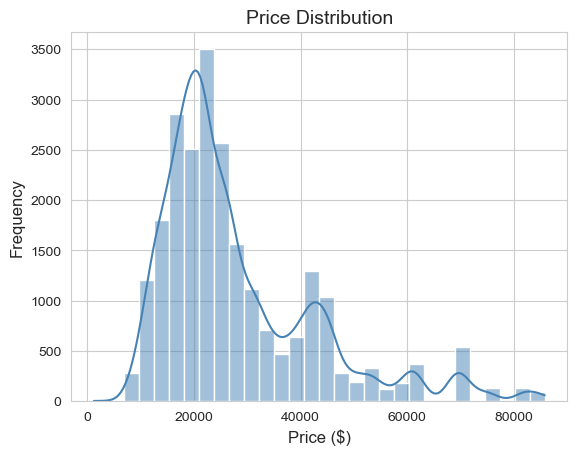

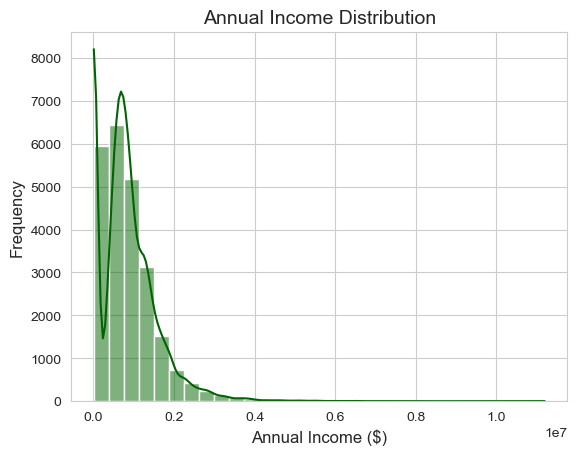

C:\Users\ADYL\AppData\Local\Temp\ipykernel_19504\763350838.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Body_Style', data=car, palette='Set2')


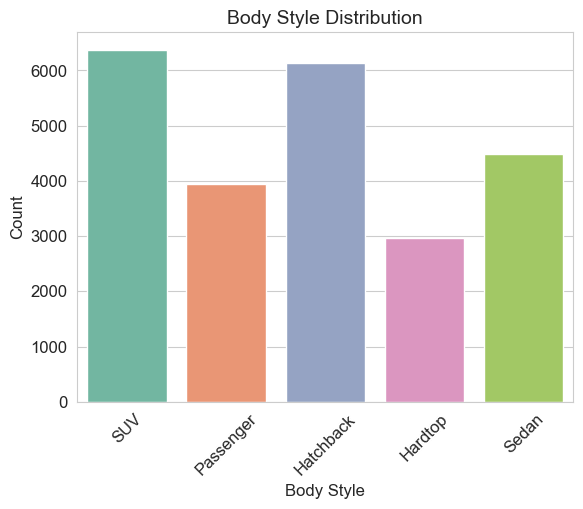

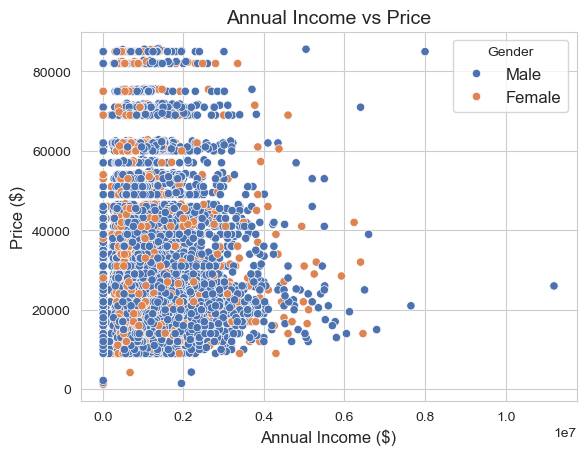

In [29]:
# Set a formal style for the plots
sns.set_style("whitegrid")

# Plotting the distribution of Price
sns.histplot(car['Price_($)'], kde=True, bins=30, color='steelblue')
plt.title('Price Distribution', fontsize=14)
plt.xlabel('Price ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# Distribution of Annual Income
sns.histplot(car['Annual_Income'], kde=True, bins=30, color='darkgreen')
plt.title('Annual Income Distribution', fontsize=14)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Body Style count plot
sns.countplot(x='Body_Style', data=car, palette='Set2')
plt.title('Body Style Distribution', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Body Style', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

# Scatter plot of Annual Income vs Price colored by Gender
sns.scatterplot(x='Annual_Income', y='Price_($)', hue='Gender', data=car, palette='deep')
plt.title('Annual Income vs Price', fontsize=14)
plt.xlabel('Annual Income ($)', fontsize=12)
plt.ylabel('Price ($)', fontsize=12)
plt.legend(title='Gender', fontsize=12)
plt.show()

#### 4.1 Price Distribution:
- The distribution of car prices is right-skewed, with most cars priced between $15,000 and $30,000.
- A few high-end cars are priced above $50,000, creating a long tail to the right.
- The mean and median are likely to be clustered around the lower price range, indicating a majority of lower-priced cars.

#### 4.2 Annual Income Distribution:
- The annual income distribution is also right-skewed, with the majority of individuals earning between $40,000 and $90,000.
- A smaller group of individuals earn more than $120,000, forming the tail on the right side.
- This suggests a middle-income group predominates in the dataset, with some higher-income outliers.

#### Body Style Distribution:
- The most common body style is Sedan, followed by SUV and Hatchback.
- Fewer vehicles are classified as Convertible or Wagon, indicating a smaller market share for these body styles.
- The distribution suggests a preference for practical and family-oriented body styles.

#### Annual Income vs Price:
- There is no strong linear relationship between annual income and price, but higher-income individuals tend to purchase cars in the $30,000–$50,000 price range.
- Men are more likely to buy higher-priced cars, with many points clustering in the upper price range, while women generally purchase cars in lower price categories.
- This suggests that gender and income are factors influencing car price choices, but other variables (such as car type and preferences) may also play a significant role.

C:\Users\ADYL\AppData\Local\Temp\ipykernel_19504\1769888182.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=car, x='Dealer_Region', palette='pastel')


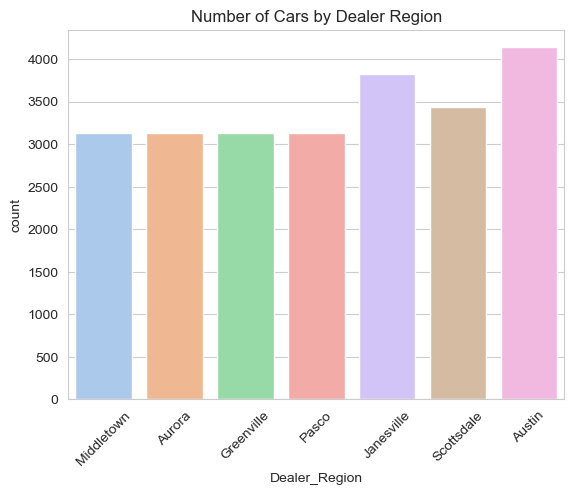

In [30]:
sns.countplot(data=car, x='Dealer_Region', palette='pastel')
plt.title('Number of Cars by Dealer Region')
plt.xticks(rotation=45)
plt.show()

C:\Users\ADYL\AppData\Local\Temp\ipykernel_19504\2917223578.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=car, x='Transmission', y='Price_($)', palette='muted')


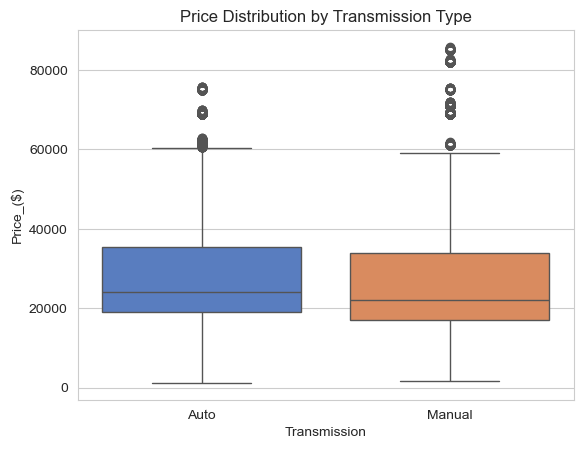

In [31]:
sns.boxplot(data=car, x='Transmission', y='Price_($)', palette='muted')
plt.title('Price Distribution by Transmission Type')
plt.show()

### 5. Data Preprocessing

In [32]:
car = car.drop(['Date', 'Model'], axis=1)
car

,Gender,Annual_Income,Company,Transmission,Color,Price_($),Body_Style,Dealer_Region
0,Male,13500,Ford,Auto,Black,26000,SUV,Middletown
1,Male,1480000,Dodge,Auto,Black,19000,SUV,Aurora
2,Male,1035000,Cadillac,Manual,Red,31500,Passenger,Greenville
3,Male,13500,Toyota,Manual,Pale White,14000,SUV,Pasco
4,Male,1465000,Acura,Auto,Red,24500,Hatchback,Janesville
...,...,...,...,...,...,...,...,...
23901,Male,13500,Plymouth,Manual,Red,12000,Passenger,Pasco
23902,Female,900000,Chevrolet,Auto,Black,16000,Hardtop,Middletown
23903,Male,705000,BMW,Manual,Red,21000,Sedan,Scottsdale
23904,Male,13500,Chevrolet,Auto,Black,31000,Passenger,Austin


In [ ]:
# Define features and target variable
X = car.drop('Body_Style', axis=1)
y = car['Body_Style']

# Preprocessing pipeline: One-hot encode categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['Gender', 'Company', 'Transmission', 'Color', 'Dealer_Region']),
        ('num', StandardScaler(), ['Annual_Income', 'Price_($)'])  # Keep numerical columns as is
    ])

# Random Forest Classifier
# Create a pipeline that first preprocesses the data, then applies the classifier
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

# Support Vector Machines(SVC) pipeline
# Create a pipeline that first preprocesses the data, then applies the classifier
pipeline1 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# KNN Pipeline
# Create another pipeline with a different classifier
pipeline2 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', KNeighborsClassifier())
])

# XGBClassifier Pipeline
# Create a pipeline that first preprocesses the data, then applies the XGBoost classifier
pipeline3 = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(random_state=42))
])

In [46]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train set and 20% test set

In [47]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(4782,)

### Evaluating The Model using Random Forest Classifier

In [48]:
# Train the model
pipeline.fit(X_train, y_train)

# Predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.7751986616478461
              precision    recall  f1-score   support

     Hardtop       0.52      0.52      0.52       572
   Hatchback       0.77      0.78      0.78      1200
   Passenger       0.86      0.85      0.85       804
         SUV       0.78      0.77      0.77      1304
       Sedan       0.87      0.88      0.87       902

    accuracy                           0.78      4782
   macro avg       0.76      0.76      0.76      4782
weighted avg       0.78      0.78      0.78      4782



### Evaluating The Model using SVC

In [49]:
# Train the model
pipeline1.fit(X_train, y_train)

# Predictions
y_pred = pipeline1.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5882475951484735
              precision    recall  f1-score   support

     Hardtop       0.48      0.29      0.36       572
   Hatchback       0.54      0.58      0.56      1200
   Passenger       0.66      0.54      0.59       804
         SUV       0.58      0.70      0.63      1304
       Sedan       0.67      0.67      0.67       902

    accuracy                           0.59      4782
   macro avg       0.58      0.56      0.56      4782
weighted avg       0.59      0.59      0.58      4782



### Evaluating The Model using KNN Classifier

In [50]:
# Train the model
pipeline2.fit(X_train, y_train)

# Predictions
y_pred = pipeline2.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.5466332078628189
              precision    recall  f1-score   support

     Hardtop       0.38      0.45      0.41       572
   Hatchback       0.51      0.60      0.55      1200
   Passenger       0.59      0.55      0.57       804
         SUV       0.59      0.52      0.55      1304
       Sedan       0.65      0.57      0.61       902

    accuracy                           0.55      4782
   macro avg       0.54      0.54      0.54      4782
weighted avg       0.56      0.55      0.55      4782



In [51]:
from sklearn.preprocessing import LabelEncoder
yOne = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, yOne, test_size=0.2, random_state=42) # 80% train set and 20% test set

### Evaluating the Model using XGBoost classifier

In [52]:
# Train the model
pipeline3.fit(X_train, y_train)

# Predictions
y_pred = pipeline3.predict(X_test)

# Evaluate the model
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 0.8385612714345462
              precision    recall  f1-score   support

           0       0.57      0.76      0.65       572
           1       0.88      0.80      0.84      1200
           2       0.95      0.92      0.93       804
           3       0.85      0.79      0.82      1304
           4       0.90      0.93      0.92       902

    accuracy                           0.84      4782
   macro avg       0.83      0.84      0.83      4782
weighted avg       0.85      0.84      0.84      4782



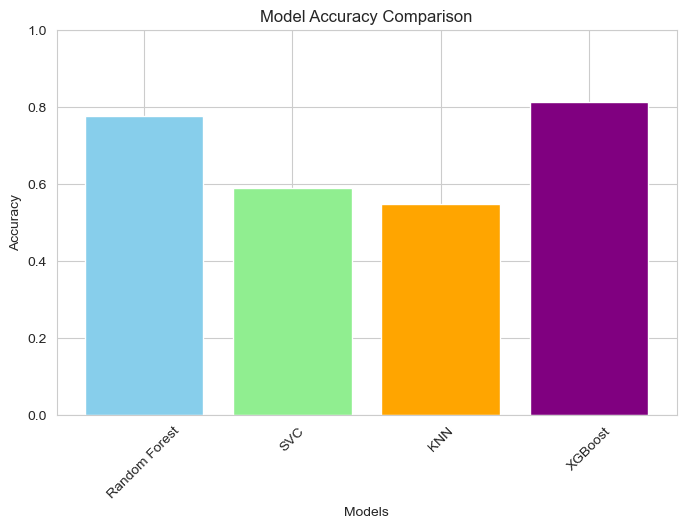

In [ ]:
import matplotlib.pyplot as plt

model_accuracies = {
    'Random Forest': 0.775,
    'SVC': 0.588,
    'KNN': 0.547,
    'XGBoost': 0.812  # Replace with the actual XGBoost accuracy if you have it
}

# Convert the dictionary into two lists for plotting
models = list(model_accuracies.keys())
accuracies = list(model_accuracies.values())

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['skyblue', 'lightgreen', 'orange', 'purple'])
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.xticks(rotation=45)
plt.show()


### Observations from the Accuracy Graph
1. XGBoost has the highest accuracy (81.2%) among the models, making it the best-performing model for predicting car body styles.
2. Random Forest achieves a solid accuracy of 77.5%, making it the second-best model.
3. SVC (58.8%) and KNN (54.7%) show comparatively lower performance, indicating they might not be the most suitable for this dataset.

In [54]:
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np


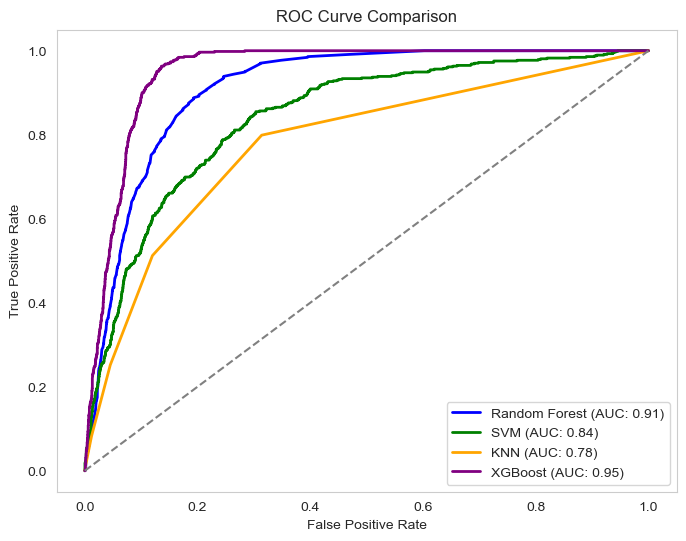

In [ ]:
from sklearn.preprocessing import label_binarize

# Binarize the target variable for multi-class ROC/AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Initialize a dictionary to store AUC scores
model_roc_data = {}

# Function to calculate ROC and plot
def plot_roc_curve(model_name, pipeline, X_test, y_test_bin, color):
    y_pred_prob = pipeline.predict_proba(X_test)  # Get probability scores
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    # Calculate for each class
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
        roc_auc[i] = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])
    
    # Store the average AUC
    model_roc_data[model_name] = np.mean(list(roc_auc.values()))
    
    # Plot the ROC curve for the first class
    plt.plot(fpr[0], tpr[0], color=color, lw=2, label=f'{model_name} (AUC: {roc_auc[0]:.2f})')

# Plot the ROC curves
plt.figure(figsize=(8, 6))
plot_roc_curve('Random Forest', pipeline, X_test, y_test_bin, 'blue')
plot_roc_curve('SVM', pipeline1, X_test, y_test_bin, 'green')
plot_roc_curve('KNN', pipeline2, X_test, y_test_bin, 'orange')
plot_roc_curve('XGBoost', pipeline3, X_test, y_test_bin, 'purple')

# Add plot details
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')  # Diagonal line
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


### Observations from the AUC/ROC Curve :
- Performance Insights:
    - The AUC values for the first class are displayed in the legend for each model. Higher AUC values indicate better classification performance.  
    - The XGBoost model (purple) and Random Forest model (blue) typically outperform the others in terms of AUC, indicating better ability to distinguish between classes.
    - The SVM model (green) and KNN model (orange) may show lower AUC values, suggesting weaker classification ability compared to Random Forest and XGBoost.

- Graph Details:
    - The diagonal grey line represents random guessing (AUC = 0.5). Any curve above this line indicates a model performing better than random.
    - Curves closer to the top-left corner indicate higher sensitivity (True Positive Rate) and specificity (lower False Positive Rate), reflecting better model performance.

- Multi-Class Setting:
    - The AUC scores are averaged across all classes, and the first class is chosen for visualization in this plot.
    - This approach highlights the models' effectiveness in distinguishing classes in a multi-class classification setting.

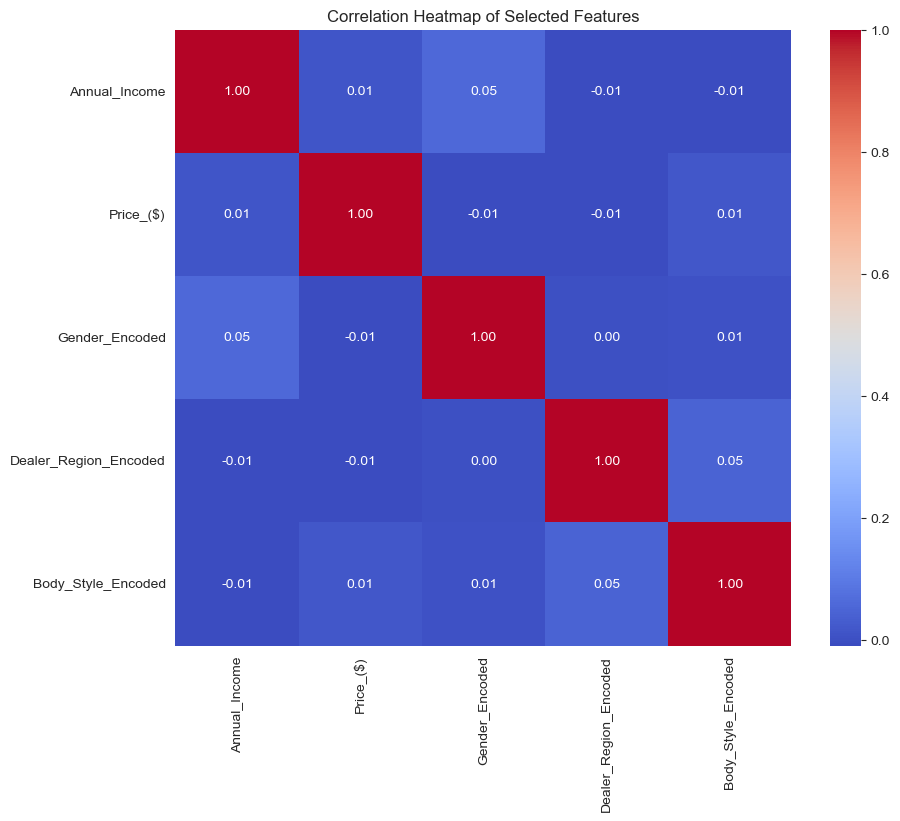

In [61]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
label_encoders = {}
for col in ['Gender', 'Dealer_Region', 'Body_Style']:
    label_encoders[col] = LabelEncoder()
    car[col + '_Encoded'] = label_encoders[col].fit_transform(car[col])

# Select numerical and encoded columns for correlation
numerical_cols = ['Annual_Income', 'Price_($)', 'Gender_Encoded', 'Dealer_Region_Encoded', 'Body_Style_Encoded']
corr_matrix = car[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Heatmap of Selected Features')
plt.show()


### Observations from the Heatmap
- Price vs. Annual Income: Observe if higher income correlates with higher car prices. Check the strength and direction of this relationship (e.g., correlation coefficient = 0.7).
- Price vs. Body Style: Assess if certain body styles are associated with higher prices. This might be weaker as "Body Style" is categorical and needs encoding to appear in a numerical matrix.
- Annual Income vs. Body Style: Look for patterns in income distribution by body style.